將預測結果視覺化，方便觀察結果，與作業繳交無關。

## Visualize (t-SNE)

In [1]:
animals = [
    "fox", "duck", "bear", "elephant", "cat",
    "zebra", "sheep", "giraffe", "dog", "lion"
]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

cluster_label = np.load("111511281.npy")
true_label = np.load("label_test.npy")
features = np.load("features.npy")

In [3]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(features[:500])

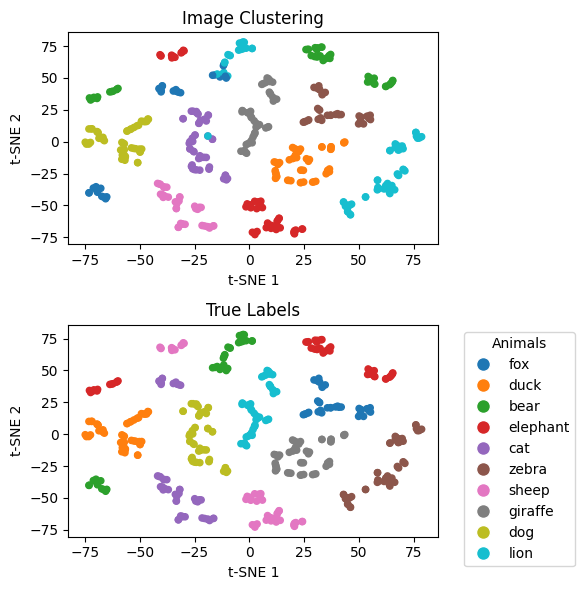

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6))

axes[0].scatter(X_embedded[:, 0], X_embedded[:, 1], c=cluster_label[:500], cmap="tab10", s=20)
axes[0].set_title("Image Clustering")
axes[0].set_xlabel("t-SNE 1")
axes[0].set_ylabel("t-SNE 2")

sc = axes[1].scatter(X_embedded[:, 0], X_embedded[:, 1], c=true_label, cmap="tab10", s=20)
axes[1].set_title("True Labels")
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")

handles = [plt.Line2D([], [], marker="o", color="w", markerfacecolor=sc.cmap(sc.norm(i)), 
                      markersize=10) for i in range(len(animals))]
axes[1].legend(handles, animals, title="Animals",
               bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

## Plot cluster images

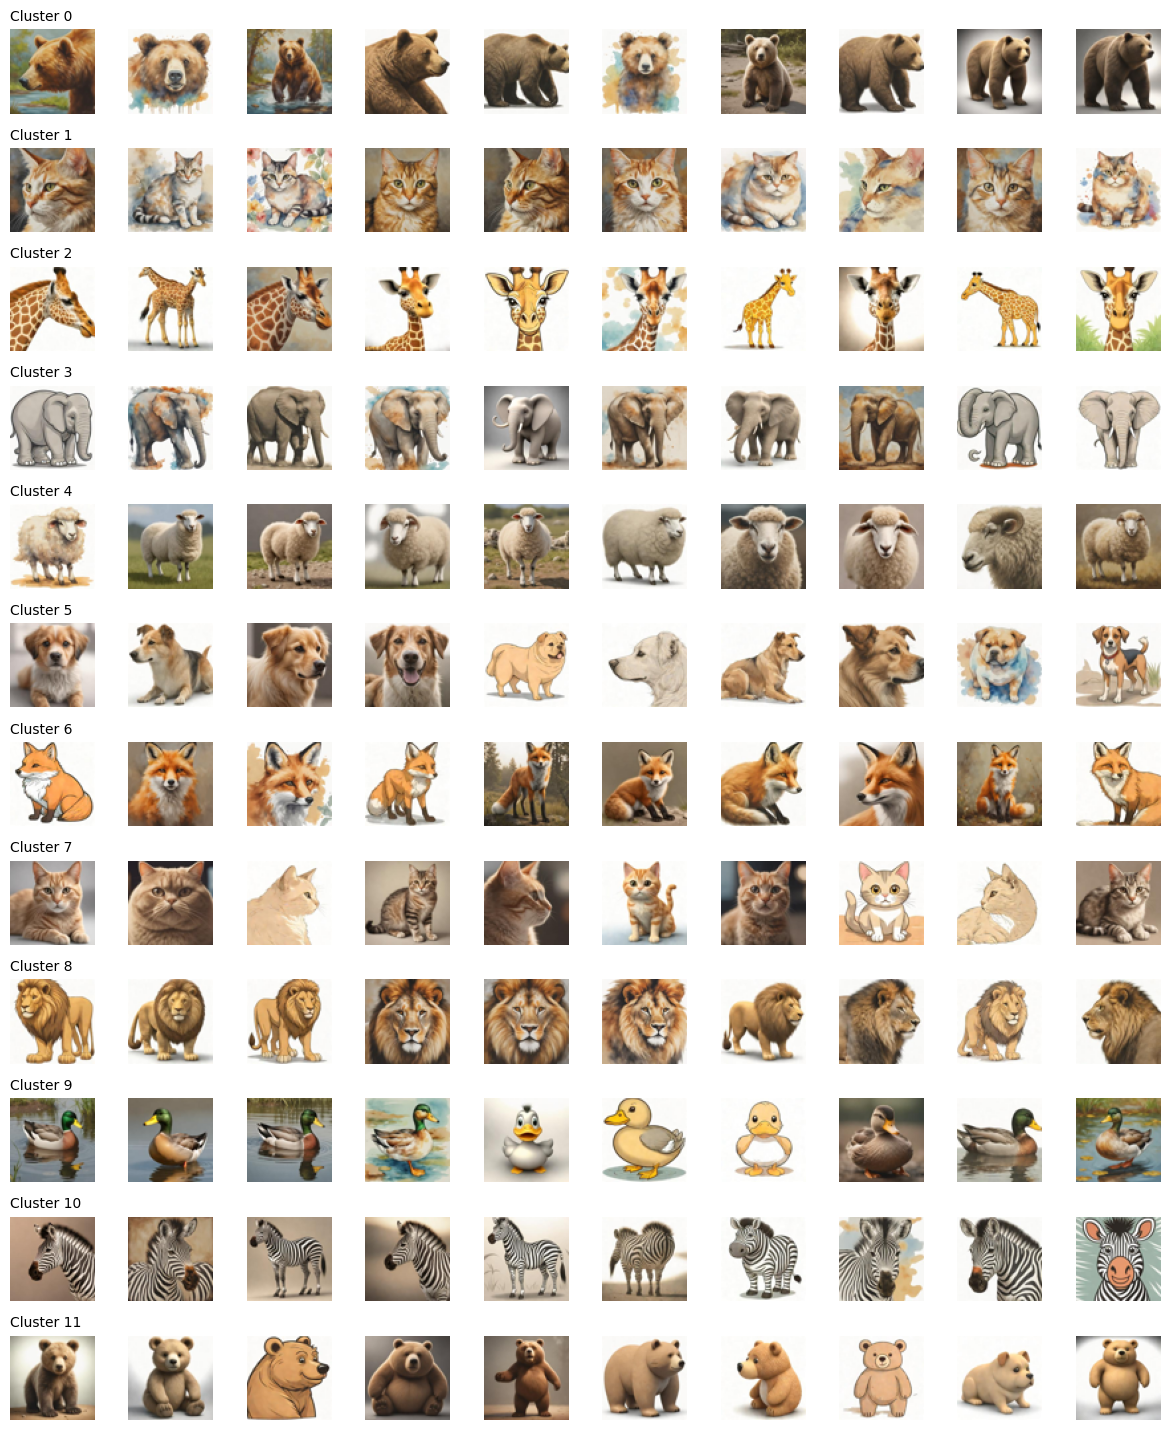

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def plot_clusters(image_folder, labels, max_per_cluster=10, img_size=(64, 64)):

    unique_labels = sorted(set(labels))
    n_clusters = len(unique_labels)

    fig, axes = plt.subplots(
        n_clusters, max_per_cluster,
        figsize=(max_per_cluster * 1.2, n_clusters * 1.2)
    )

    if n_clusters == 1:
        axes = [axes]

    for row, cluster_id in enumerate(unique_labels):
        cluster_imgs = [f"{i:04d}.jpg" for i in range(len(labels)) if labels[i] == cluster_id]
        cluster_imgs = cluster_imgs[:max_per_cluster]

        for col in range(max_per_cluster):
            ax = axes[row][col] if n_clusters > 1 else axes[col]
            ax.axis("off")
            if col < len(cluster_imgs):
                img = cluster_imgs[col]
                if isinstance(img, str):
                    im = Image.open(os.path.join(image_folder, img)).resize(img_size)
                else:
                    im = Image.fromarray(img).resize(img_size)
                ax.imshow(im)

        axes[row][0].set_title(f"Cluster {cluster_id}", fontsize=10, loc="left")

    plt.tight_layout()
    plt.show()


image_folder = "./data"
plot_clusters(image_folder, cluster_label)
